In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("login_hours.csv")

In [15]:
df.head()

,active_date,wk,category,service_city,car_number,login_hours,active_hours
0,2018-11-27,48,mini,hyderabad,AP01TV0906,12.007778,7.466667
1,2018-11-21,47,mini,hyderabad,AP02TV2290,0.027500,0.000000
2,2018-11-17,46,mini,hyderabad,AP02TV6490,8.843611,6.700000
3,2018-11-17,46,economy_suv,hyderabad,AP03TB9627,2.074444,0.650000
4,2018-11-27,48,economy_suv,hyderabad,AP03TL3034,18.920556,6.383333


In [16]:
df = df.sort_values(by=['car_number','active_date'],ascending=[True,True])
df = df[df.category != "auto"]

In [17]:
number_of_days = df["car_number"].value_counts()
number_of_days = number_of_days.sort_index()

In [18]:
total_login_hours = df.groupby(["car_number"])["login_hours"].sum()
total_login_hours = total_login_hours.sort_index()

In [28]:
df1 = pd.concat([number_of_days,total_login_hours],axis=1)
df1.columns = ['number_of_days', 'login_hours']
df1["hours_per_day"] = df1["login_hours"]/df1["number_of_days"]

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=2)

In [31]:
kmeans.fit(df1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [34]:
df1["labels"] = kmeans.labels_

In [37]:
df1["labels"] = df1["labels"].map({0:"full_timer",1:"part_timer"})

In [40]:
df1 = df1.head(2000)

In [41]:
df1

,number_of_days,login_hours,hours_per_day,labels
car_number,,,,
A29TV6235,8,9.846944,1.230868,part_timer
AP01TV0821,7,63.160556,9.022937,part_timer
AP01TV0906,28,236.926389,8.461657,part_timer
AP02TV1883,44,320.696389,7.288554,part_timer
AP02TV2215,8,55.156667,6.894583,part_timer
AP02TV2290,15,23.669167,1.577944,part_timer
AP02TV2579,29,321.905556,11.100192,part_timer
AP02TV6490,21,110.266389,5.250780,part_timer
AP02TV6695,8,92.548056,11.568507,part_timer


In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X = df1.drop('labels',axis=1)
y = df1['labels']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
predictions = dtree.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

 full_timer       1.00      0.99      0.99        84
 part_timer       1.00      1.00      1.00       516

avg / total       1.00      1.00      1.00       600



In [53]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df1.columns[:3])
features

['number_of_days', 'login_hours', 'hours_per_day']

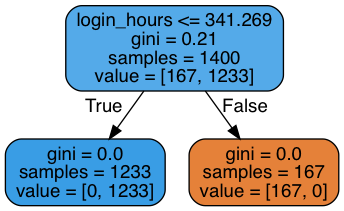

In [54]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  